# Notebook to visualise/analyse model predictions

In [26]:
import sys
import os
import torch
from omegaconf import OmegaConf

sys.path.append(os.path.dirname(os.path.abspath('.')))
from model.dataset import create_dataloaders
from model.model import GMMModel

cfg = OmegaConf.load('/home/lc865/workspace/DL-GNNs/Temporal-Graph-MLP-Mixer/src/TGMM-1/train/metrla.yaml')
train_loader, val_loader, _, topo_data, metadata = create_dataloaders(cfg, raw_data_dir='/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/data')

# Initialize model with Lightning
# model = GMMModel(cfg, topo_data, metadata)

# Load model checkpoint using Lightning
checkpoint_path = '/mnt/cephfs/store/gr-mc2473/lc865/workspace/GNN/checkpoints/last-v28.ckpt'
model = GMMModel.load_from_checkpoint(checkpoint_path, cfg=cfg, topo_data=topo_data, metadata=metadata)

# Move model to GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

# Set model to evaluation mode
model.eval()
pass


Dataloaders and Topology Data Overview:
Batch size: 16
----------------------------------------------------------
Name                 | Samples      | Batches     
----------------------------------------------------------
Train Loader         | 30824        | 1926        
Val Loader           | 3424         | 214         

Topology Data:
Number of nodes: 207
Number of edges: 1722
----------------------------------------------------------


In [19]:
metadata

{'norm_mean': 53.59967, 'norm_std': 20.209862}

In [27]:
batch = next(iter(val_loader))

In [29]:
pred = model(batch[0].to(device))
true = batch[1].to(device)

pred = pred * metadata['norm_std'] + metadata['norm_mean']
true = true * metadata['norm_std'] + metadata['norm_mean']

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu! (when checking argument for argument mat1 in method wrapper_addmm)

In [15]:
true.shape

torch.Size([16, 207, 12])

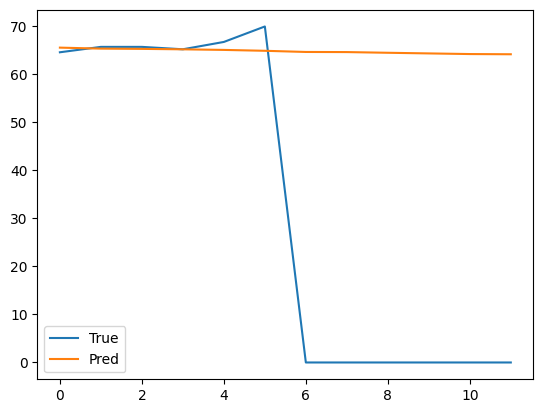

In [22]:
from matplotlib import pyplot as plt

plt.plot(true[0, 0, :].cpu().detach().numpy().T, label='True')
plt.plot(pred[0, 0, :].cpu().detach().numpy().T, label='Pred')
plt.legend()
plt.show()
